In [21]:
import pandas as pd
_data = pd.read_hdf('/Users/johnsonhsiao/Desktop/BTCUSDT_PERPETUAL.h5')

In [22]:
cols = ['open', 'high', 'low', 'close','volume']
agg =  ['first','max',  'min', 'last', 'sum']
df = _data[cols]
df = df.resample('1h').agg(dict(zip(cols,agg)))

In [102]:
import datetime
df = df[df.index > datetime.datetime(2022,1,1)]
df['weekday'] = df.index.weekday+1
df['hour'] = df.index.hour
df['return'] = df['close'].pct_change()
df = df.dropna()
weekend = []
weekday = []
ret = 0
for _, row in df.iterrows():
    if row['weekday'] == (6 or 7):
        ret += abs(row['return'])
        if row['hour'] == 0 and row['weekday'] == 6:
            weekday.append(ret)
            ret = 0
    else:
        ret += abs(row['return'])
        if row['hour'] == 0 and row['weekday'] == 1:
            weekend.append(ret)
            ret = 0

### 假日波動度大，平日波動度也會較大

In [103]:
import numpy as np
correlation = np.corrcoef(weekday, weekend[:-1])[0, 1]
correlation

0.6273041970967497

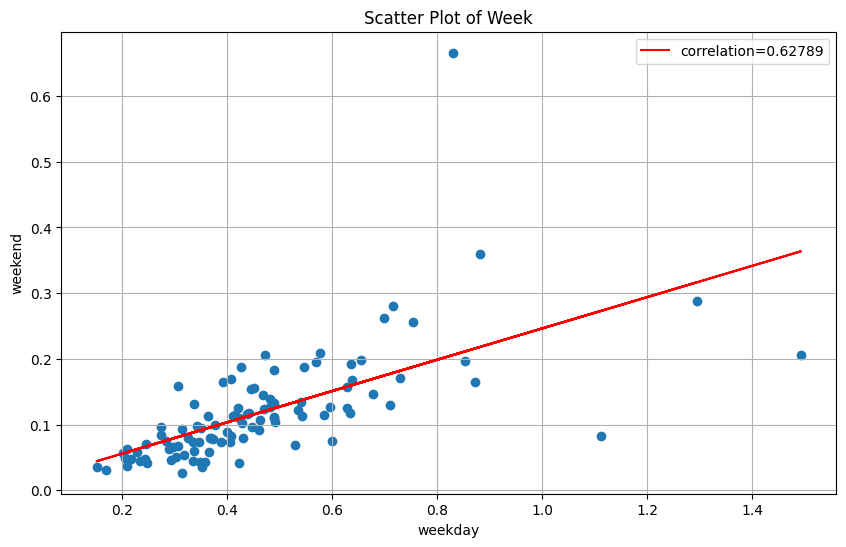

In [97]:
import matplotlib.pyplot as plt
from scipy import stats

weekday_array = np.array(weekday)
weekend_array = np.array(weekend[:-1])
slope, intercept, r_value, p_value, std_err = stats.linregress(weekday, weekend[:-1])
line = slope * weekday_array + intercept
# 使用 matplotlib 绘制两个列表
plt.figure(figsize=(10, 6))
plt.scatter(weekday_array, weekend_array)
plt.plot(weekday, line, color='red', label=f'correlation={round(correlation,5)}')
plt.title("Scatter Plot of Week")
plt.xlabel("weekday")
plt.ylabel("weekend")
plt.grid(True)
plt.legend()
plt.show()

In [90]:
import datetime
df = df[df.index > datetime.datetime(2022,1,1)]
df['weekday'] = df.index.weekday+1
df['hour'] = df.index.hour
df['return'] = df['close'].pct_change()
df = df.dropna()
weekend = []
weekday = []
ret = 0
o = df['open'].iloc[0]
for _, row in df.iterrows():
    if (row['weekday'] == 6) and (row['hour'] == 0):
        o = row['open']
    if (row['weekday'] == 7) and (row['hour'] == 23):
        c = row['close']
        weekend.append(c/o-1) 
    if (row['weekday'] == 1) and (row['hour'] == 0):
        o = row['open']
    if (row['weekday'] == 5) and (row['hour'] == 23):
        c = row['close']
        weekday.append(c/o-1) 

### 假日return和週間的return較無關係

In [92]:
import numpy as np
correlation = np.corrcoef(weekday, weekend[:-1])[0, 1]
correlation

0.29741168168126514

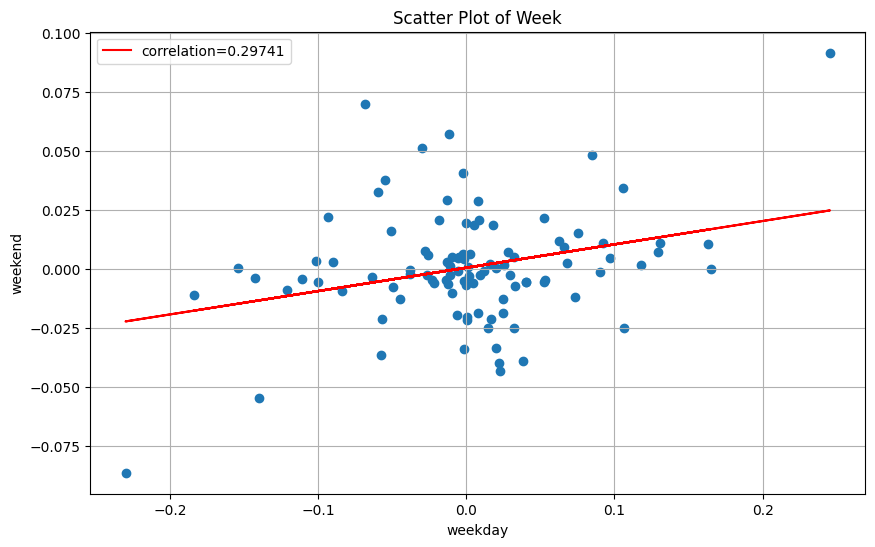

In [93]:
import matplotlib.pyplot as plt
from scipy import stats

weekday_array = np.array(weekday)
weekend_array = np.array(weekend[:-1])
slope, intercept, r_value, p_value, std_err = stats.linregress(weekday, weekend[:-1])
line = slope * weekday_array + intercept
# 使用 matplotlib 绘制两个列表
plt.figure(figsize=(10, 6))
plt.scatter(weekday_array, weekend_array)
plt.plot(weekday, line, color='red', label=f'correlation={round(correlation,5)}')
plt.title("Scatter Plot of Week")
plt.xlabel("weekday")
plt.ylabel("weekend")
plt.grid(True)
plt.legend()
plt.show()